Data import and preprocessing

In [217]:
import json
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# import CSD data via API
# load dataset component into dataframe

# create a summarize product category mapping
typelist = pd.DataFrame(None)

url_67002 = "https://www.censtatd.gov.hk/api/get.php?id=620-67002&lang=en&param=N4KABGBEDGBukC4yghSB5AqgFQDIFFsB9bATQAV9EwBtcVNAJkgBp6HIAOV91SATh4M0ARmZthUEdwnDIAZgAMQufPG808gKwqOAFkGyO83Xz2m0Oo3wBsFqAHZ7kESeujz7qYY1RGb30gtEWd5Oy8FJwj5GUD5H0lIPWVeAF16AF9ZSABneCQUPgA1AEFcIgAlAGVqOkSKgEMAdyIAWSIACwBrABMiHsg060hS8oBJABEADUqapDq5RpaRHoAHIgBLHoAPIgA7Z1IAe1IiFfWAUiIcwYZ0iCz6SFWAUwAnDaOBgt5cgBcGm8-tRIIxFIo9CIUg9slsQTYwQBaGwOcHqNAAGwaewA5iCXgcQBkgA"
with urllib.request.urlopen(url_67002) as url:
	js_retail = json.loads(url.read().decode("utf8"))
	df_retail = pd.DataFrame.from_dict(js_retail['dataSet'])
	df_retail = df_retail[df_retail['sv'] == 'VAL_RS']
	df_retail['table_id'] = '620-67002'
	# remove spaces before sub-levels in OUTLET_TYPEDesc
	df_retail['OUTLET_TYPEDesc'] = df_retail['OUTLET_TYPEDesc'].str.replace('    ', '')
	# extend product category mapping list
	typelist_tmp = df_retail[['OUTLET_TYPE', 'OUTLET_TYPEDesc']].drop_duplicates()
	typelist_tmp['table_id'] = '620-67002'
	typelist = pd.concat([typelist, typelist_tmp], axis = 0)

url_67003 = "https://www.censtatd.gov.hk/api/get.php?id=620-67003&lang=en&param=N4KABGBEDGBukC4yghSB5AqgFQDIFFsB9bATQAV9EwBtcVNAJkgBp6HIAOV91SATh4M0ARmZthUEdwnDIAZgAMQufPG808gKwqOAFkGyO83Xz2m0Oo3wBsFqAHZ7kESeujz7qYY1RGb30gtEWd5Oy8FJwj5GUD5H0lIPWVeAF16AF9ZSABneCQUPgA1dFwiAEkAEQANIgAlAGVqOkS6gEMAdyIRABMAByIASx6ADyIAO2dSAHtSbv6iAFIiHMg0zOy+gFMAJ0HpnupCtByAFzad0+pIRkVFPREUiCz6SGHrm1uAWhsHO4C0AAbNrjADm1y2kxAGSAA"
with urllib.request.urlopen(url_67003) as url:
	js_vol = json.loads(url.read().decode("utf8"))
	df_vol = pd.DataFrame.from_dict(js_vol['dataSet'])
	df_vol = df_vol[df_vol['svDesc'] == 'Index']
	df_vol['table_id'] = '620-67003'
	# remove spaces before sub-levels in OUTLET_TYPEDesc
	df_vol['OUTLET_TYPEDesc'] = df_vol['OUTLET_TYPEDesc'].str.replace('    ', '')
	# extend product category mapping list
	typelist_tmp = df_vol[['OUTLET_TYPE', 'OUTLET_TYPEDesc']].drop_duplicates()
	typelist_tmp['table_id'] = '620-67003'
	typelist = pd.concat([typelist, typelist_tmp], axis = 0)

url_67011 = "https://www.censtatd.gov.hk/api/get.php?id=620-67011&lang=en&param=N4KABGBEDGBukC4yghSB5AqgFQDIFFsB9bATQAV9EwBtcVNADknogF0AaVqAIQCV0AQQAiRcgNEBhQdmp0GaAMoBGSFwVRFAJjXclAZl0bIigCwsGbegF91UAM7wkKVJABqg3ET6K5eqHwAhgDuRACyRAAWANYAJkSxFqhWELb0kAAOAKYATgCWAPaJztyQ9gAugTnl1JBaAAz1psr1SWloecVQAGwNALTdAOz1yqp2kAA2gQB2AOa1WdMs1kA"
with urllib.request.urlopen(url_67011) as url:
	js_super = json.loads(url.read().decode("utf8"))
	df_super = pd.DataFrame.from_dict(js_super['dataSet'])
	df_super = df_super[df_super['sv'] == 'VAL_RS']
	df_super['table_id'] = '620-67011'
	typelist_tmp = df_super[['OUTLET_TYPE', 'OUTLET_TYPEDesc', 'BROAD_PROD_CAT', 'BROAD_PROD_CATDesc']].drop_duplicates()
	typelist_tmp['table_id'] = '620-67011'
	typelist = pd.concat([typelist, typelist_tmp], axis = 0)

url_67012 = "https://www.censtatd.gov.hk/api/get.php?id=620-67012&lang=en&param=N4KABGBEDGBukC4yghSB5AqgFQDIFFsB9bATQAV9EwBtcVNAZgAZJ6IBdAGnagCEASugCCAESLkh4gMLDs1OgzSiAjEVEA2SDyVRRAdm29lKo7siiATGaUXGNhhYAsD1BYCsr5Vt4d6AXx0oAGd4JBQ3ADVhXCIBAGUFYygBAEMAdyIAWSIACwBrABMiQrYGPwhA+kgABwBTACcASwB7UvDeSGCAF1SG7upIS2ZmJxVWAKDIJvaoDWGAWg19ZhVrKYAbVIA7AHNBuu22fyA"
with urllib.request.urlopen(url_67012) as url:
	js_dept = json.loads(url.read().decode("utf8"))
	df_dept = pd.DataFrame.from_dict(js_dept['dataSet'])
	df_dept = df_dept[df_dept['sv'] == 'VAL_RS']
	df_dept['table_id'] = '620-67012'
	typelist_tmp = df_dept[['OUTLET_TYPE', 'OUTLET_TYPEDesc', 'BROAD_PROD_CAT', 'BROAD_PROD_CATDesc']].drop_duplicates()
	typelist_tmp['table_id'] = '620-67012'
	typelist = pd.concat([typelist, typelist_tmp], axis = 0)

url_cpi = "https://www.censtatd.gov.hk/api/get.php?id=510-60001A&lang=en&param=N4KABGBEDGBukC4yghSBxASgeQKoAVEwBtcVNAZQEZIAaM8yCgJjodSYGY3zKAWHryYBWQYwoA2MRwoB2aZQAcCqBQCckdgF0yAX3poAzvCQoOAYXMB9cwFkrVNcwAMRUryiYAhgHcHAEwAHKwBLfwAPKwA7FUhbAHt7KiCrAFIrQ1iATXisgOD0zO0DDgAhGySnVyR3IW8-ZOCwyJiSxgSklMLs3Py0jM1yLTaoazsHKrd2NHq+5ujYjr7ukbQcvMb+oqGRyABBComXKY9IWc351umoJc2V68h15YHtPRLIQIBTACcQ+P8iGYjAAXLzfYFESCOWR8ZzyN5kSBhSHCKjOAC0Emc2Koe0EkAANl4ogBzSGfGIgXRAA"
with urllib.request.urlopen(url_cpi) as url:
	js_cpi = json.loads(url.read().decode("utf8"))
	cpi = pd.DataFrame.from_dict(js_cpi['dataSet'])
	cpi = cpi.loc[cpi['svDesc'] == 'Index']
	cpi['table_id'] = '510-60001A'
	typelist_tmp = cpi[['GROUP', 'GROUPDesc']].drop_duplicates()
	typelist_tmp['table_id'] = '510-60001A'
	typelist = pd.concat([typelist, typelist_tmp], axis = 0)

del typelist_tmp

In [218]:
# inquire OUTLET_TYPE / BROAD_PROD_CAT code for desired keyword (Phase match)

# Example: search for alcoholic related retail outlet / product
keyword_ipt = 'alcoholic'
excl_keyword_ipt = 'non-alcoholic'

# subset typelist by phase match
type_select =  pd.concat([typelist.loc[(typelist['OUTLET_TYPEDesc'].fillna('').str.lower().str.contains(keyword_ipt)) & \
                                       ~(typelist['OUTLET_TYPEDesc'].fillna('').str.lower().str.contains(excl_keyword_ipt))], 
                          typelist.loc[(typelist['BROAD_PROD_CATDesc'].fillna('').str.lower().str.contains(keyword_ipt)) & \
                                       ~(typelist['BROAD_PROD_CATDesc'].fillna('').str.lower().str.contains(excl_keyword_ipt))],
                          typelist.loc[(typelist['GROUPDesc'].fillna('').str.lower().str.contains(keyword_ipt)) & \
                                       ~(typelist['GROUPDesc'].fillna('').str.lower().str.contains(excl_keyword_ipt))]],
                          axis = 0)
type_select

,OUTLET_TYPE,OUTLET_TYPEDesc,table_id,BROAD_PROD_CAT,BROAD_PROD_CATDesc,GROUP,GROUPDesc
6,2,"Food, alcoholic drinks and tobacco (other than...",620-67002,NaN,NaN,NaN,NaN
22,7,Alcoholic drinks and tobacco,620-67002,NaN,NaN,NaN,NaN
6,2,"Food, alcoholic drinks and tobacco (other than...",620-67003,NaN,NaN,NaN,NaN
22,7,Alcoholic drinks and tobacco,620-67003,NaN,NaN,NaN,NaN
3,8,Supermarkets,620-67011,S3,Alcoholic drinks and tobacco,NaN,NaN
1,30,Department stores,620-67012,D1,"Food, alcoholic drinks and tobacco",NaN,NaN
4,NaN,NaN,510-60001A,NaN,NaN,S4,Alcoholic drinks and tobacco


In [219]:
# drop OUTLET_TYPE 2 as OUTLET_TYPE 7 is nested in it
if 7 in type_select['OUTLET_TYPE'].fillna(-1).astype(int).unique():
    type_select = type_select[type_select['OUTLET_TYPE'].fillna(-1).astype(int) != 2]
else:
    pass
type_select

,OUTLET_TYPE,OUTLET_TYPEDesc,table_id,BROAD_PROD_CAT,BROAD_PROD_CATDesc,GROUP,GROUPDesc
22,7,Alcoholic drinks and tobacco,620-67002,NaN,NaN,NaN,NaN
22,7,Alcoholic drinks and tobacco,620-67003,NaN,NaN,NaN,NaN
3,8,Supermarkets,620-67011,S3,Alcoholic drinks and tobacco,NaN,NaN
1,30,Department stores,620-67012,D1,"Food, alcoholic drinks and tobacco",NaN,NaN
4,NaN,NaN,510-60001A,NaN,NaN,S4,Alcoholic drinks and tobacco


Aggregrate complete data table for selected category for chart plotting in annual basis
- retail sales variable label indicated in col 'sv' : 'VAL_RS'
- col 'figure' for corresponding value
- figures of table 620-67002, 620-67011, 620-67012 are in HK$ million

Notes on data coverage and grouping:
1. department store data D1-D6 are for Non-supermarket sections
2. department store Supermarket sections has no further product sub-categories

In [ ]:
# annaul data
freq_option = 'Y'
period_start = 2010

# select necessary data 
# retail sales table (620-67002)
type_label = 'OUTLET_TYPE'
df_retail_annual = df_retail.loc[(df_retail['freq'] == freq_option) & \
                                 (df_retail[type_label].isin(type_select.loc[type_select['table_id'] == df_retail['table_id'].unique()[0], type_label].unique()))]

# supermarket retail sales table (620-67011)
type_label = 'BROAD_PROD_CAT'
df_super_annual = df_super.loc[(df_super['freq'] == freq_option) & \
                               (df_super[type_label].isin(type_select.loc[type_select['table_id'] == df_super['table_id'].unique()[0], type_label].unique()))]

# department store retail sales table (620-67012)
type_label = 'BROAD_PROD_CAT'
df_dept_annual = df_dept.loc[(df_dept['freq'] == freq_option) & \
                             (df_dept[type_label].isin(type_select.loc[type_select['table_id'] == df_dept['table_id'].unique()[0], type_label].unique()))]

# retail volume table (620-67003)
type_label = 'OUTLET_TYPE'
df_vol_annual = df_vol.loc[(df_vol['freq'] == freq_option) & \
                           (df_vol[type_label].isin(type_select.loc[type_select['table_id'] == df_vol['table_id'].unique()[0], type_label].unique()))]

# composite cpi (510-60001A)
cpi_sv = 'CC_CM_1920'
type_label = 'GROUP'
cpi_annual = cpi.loc[(cpi['freq'] == freq_option) & \
                     (cpi['sv'] == cpi_sv) & \
                     (cpi[type_label].isin(type_select.loc[type_select['table_id'] == cpi['table_id'].unique()[0], type_label].unique()))]

# merge selected retail sales tables
cols = ['OUTLET_TYPE', 'OUTLET_TYPEDesc', 'period', 'sv', 'svDesc', 'figure', 'table_id']
int_cols = ['period', 'figure']
df_annual = pd.concat([df_retail_annual.loc[df_retail_annual['period'].astype(int) >= period_start, cols],
                       df_super_annual.loc[df_super_annual['period'].astype(int) >= period_start, cols],
                       df_dept_annual.loc[df_dept_annual['period'].astype(int) >= period_start, cols]],
                       axis = 0)
df_annual[int_cols] = df_annual[int_cols].fillna(-1).astype(int)

# calculate annual sum for all related retail sales tables
df_annual_sum = df_annual[df_annual[int_cols[1]] != -1].groupby(by = int_cols[0])[int_cols[1]].sum().reset_index(drop = False)
df_annual_sum.tail(3)

# cpi and direct retail vol
cpi_annual = cpi_annual.loc[cpi_annual['period'].astype(int) >= period_start]
cpi_annual[int_cols] = cpi_annual[int_cols].fillna(-1).astype(int)
df_vol_annual = df_vol_annual.loc[df_vol_annual['period'].astype(int) >= period_start]
df_vol_annual[int_cols] = df_vol_annual[int_cols].fillna(-1).astype(int)

# pivot annual retail sales by OUTLET_TYPEDesc
df_annual_pivot = df_annual.pivot(index = int_cols[0], columns = 'OUTLET_TYPEDesc', values = int_cols[1]).reset_index(drop = False)
df_annual_pivot = df_annual_pivot.merge(
                       df_annual_sum.rename(columns = {'figure' : 'total'}), on = int_cols[0]).merge(
                       cpi_annual[int_cols].rename(columns = {'figure' : 'cpi'}), on = int_cols[0]).merge(
                       df_vol_annual[int_cols].rename(columns = {'figure' : 'direct_vol'}), on = int_cols[0])

# rename non-department & non-supermarket sales to 'Direct Sales'
df_annual_pivot = df_annual_pivot.rename(columns = {'Alcoholic drinks and tobacco' : 'Direct Sales'})
df_annual_pivot.tail(3)

C:\Users\Miko\AppData\Local\Temp\ipykernel_19888\242552221.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_annual[int_cols] = df_annual[int_cols].fillna(-1).astype(int)
C:\Users\Miko\AppData\Local\Temp\ipykernel_19888\242552221.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cpi_annual[int_cols] = cpi_annual[int_cols].fillna(-1).astype(int)
C:\Users\Miko\AppData\Local\Temp\ipykernel_19888\242552221.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.i

,period,Direct Sales,Department stores,Supermarkets,total,cpi,direct_vol
12,2022,1325,4049,12141,17515,101,52
13,2023,3711,5294,11639,20644,118,126
14,2024,4793,4274,10335,19402,142,139


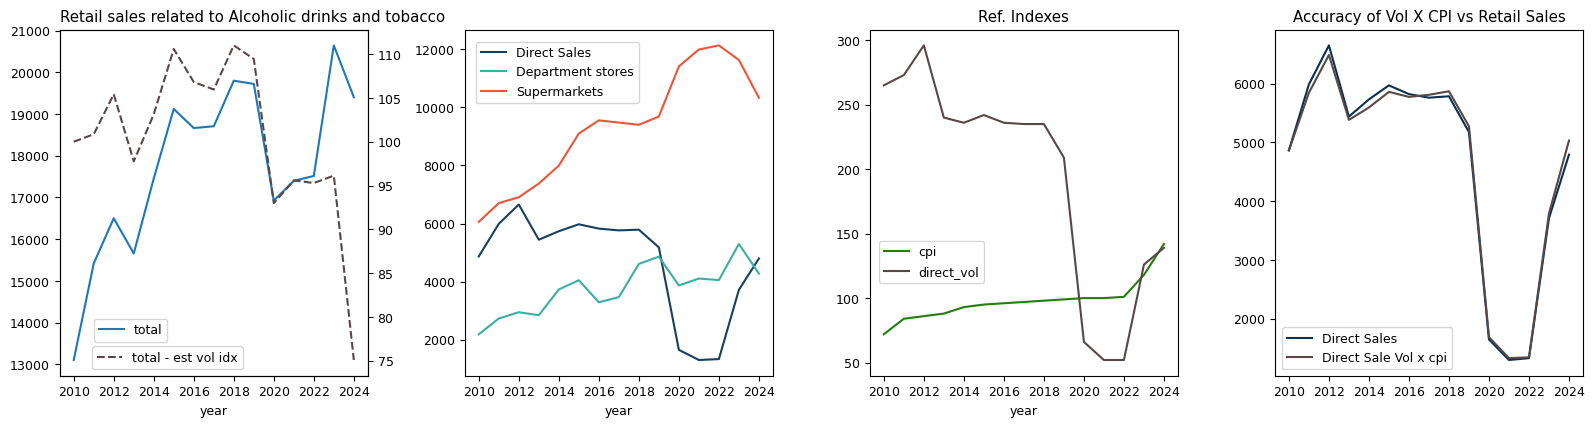

In [322]:
# plots count and size
import matplotlib
matplotlib.rcParams.update({'font.size': 9})

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
df_plot = df_annual_pivot

# colors
c_dict = dict(zip(df_plot.columns[1: 4], ['#173F5F', '#3CAEA3', '#ED553B']))
ref_dict = dict(zip(df_plot.columns[-2:], ["#247C0E", '#574848']))
direct_dict = dict({df_plot.columns[1] : '#093050', 'direct_vol_cpi' : '#574848'})

# plot
ax[0].plot(df_plot['period'], df_plot['total'], label = 'total')
ax0sec =  ax[0].twinx()
ax0sec.plot(df_plot['period'], (df_plot['total'] * 100 /  df_plot.loc[0, 'total'] ) / (df_plot['cpi'] / df_plot.loc[0, 'cpi']), label = 'total - est vol idx', ls = '--', c = '#574848')

for s in df_plot.columns[1: 4]:
    ax[1].plot(df_plot['period'], df_plot[s], c = c_dict[s], label = s)

for s in df_plot.columns[-2:]:
    ax[2].plot(df_plot['period'], df_plot[s], c = ref_dict[s], label = s)

direct_sale = df_plot.columns[1]
ax[3].plot(df_plot['period'], df_plot[direct_sale], label =  direct_sale, c = direct_dict[direct_sale])
ax[3].plot(df_plot['period'], df_plot['direct_vol'] * (df_plot['cpi'] / df_plot.loc[0, 'cpi']) * (df_plot.loc[0, direct_sale] / df_plot.loc[0, 'direct_vol']), 
           label = 'Direct Sale Vol x cpi', c = direct_dict['direct_vol_cpi'])

plt.tight_layout()

# chart elements
ax[0].set_title('Retail sales related to Alcoholic drinks and tobacco', loc = 'left')
ax[2].set_title('Ref. Indexes')
ax[3].set_title('Accuracy of Vol X CPI vs Retail Sales')
ax[0].set_xlabel('year')
ax[1].set_xlabel('year')
ax[2].set_xlabel('year')
ax[0].legend(loc = 8, bbox_to_anchor = (0.23, 0.08))
ax0sec.legend(loc = 8, bbox_to_anchor = (0.35, 0))
ax[1].legend(loc = 8, bbox_to_anchor = (0.3, 0.77))
ax[2].legend(loc = 8, bbox_to_anchor = (0.2, 0.25))
ax[3].legend(loc = 8, bbox_to_anchor = (0.3, 0))

plt.show()

In the above leftmost chart, total retail sales and volume index related to tobacoo and alcholic drinks is approximated by 3 component:
- Alcoholic drinks and tobacco (other than supermarkets) (renamed as Direct Sales)
- Alcoholic drinks and tobacco in Supermarket
- Food, alcoholic drinks and tobacco in Department Stores
Est. volume index is approximated by offsetting CPI from retail sales, with 2010 data = 100

Possible factor on CPI - changes of related taxes:
- May-15-2009 : the Financial Secretary increased tobacco tax by 50% (i.e. $24 per pack)
- Apr-13-2011 : increase in tobacco duty by $0.5 per stick ($34 per pack)
- Feb-23-2023 : the duty on cigarettes adds $0.6 per stick ($2.506 per stick = $50.12 per pack)
- Feb-28-2024 : the duty on cigarettes adds $0.8 per stick ($3.306 per stick = $66.12 per pack)
- Oct-14-2024 : liquor tax (>$200) from 100% to 10%